In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


# 1) Sample Size Calculation

In [2]:
N = 226
d = 0.2
z = 1.96

# Group A
p1 = 0.48
q1 = 1 - p1
n1 = (N*p1*q1*(z**2))/((p1*q1*(z**2))+((N-1)*(d**2)))
print("Sample size Group A:", n1)

# Group B
p2 = 0.53
q2 = 1 - p2
n2 = (N*p2*q2*(z**2))/((p2*q2*(z**2))+((N-1)*(d**2)))
print("Sample size Group B:", n2)


Sample size Group A: 21.759824542868305
Sample size Group B: 21.72042444322386


# 2) Test of Equality of Two Proportions

In [3]:
x1, n1 = 15, 22
x2, n2 = 9, 22

p1_hat = x1/n1
p2_hat = x2/n2

p_pool = (x1 + x2) / (n1 + n2)

z = (p1_hat - p2_hat) / np.sqrt(p_pool*(1-p_pool)*(1/n1 + 1/n2))
print("Z value:", z)

z_critical = 1.96
print("Decision:", "Accept H0" if abs(z) < z_critical else "Reject H0")


Z value: 1.8165902124584945
Decision: Accept H0


# 3) Run Test (Test of Randomness)

In [4]:
sequence = "YNNYYYYNYYYNYYNYYYYNNYYYYYYYYYYYYYYNNYNNYYYNNYNNYYYYNYYYNNNYNNNYYNYYYYYYYYYNNYNYYNYYYNYNYYNYYYYYYYYYYNYNNNNYYYYNYNNNYYYYYYNYYYNNYNNNYYYYYNNNYNN"

data = np.array(list(sequence))

n1 = np.sum(data == "Y")
n2 = np.sum(data == "N")

runs = 1 + np.sum(data[:-1] != data[1:])

Er = 1 + (2*n1*n2)/(n1+n2)
Var_r = (2*n1*n2*(2*n1*n2 - n1 - n2))/(((n1+n2)**2)*(n1+n2-1))

z = (runs - Er)/np.sqrt(Var_r)

print("Runs:", runs)
print("Z value:", z)
print("Decision:", "Accept H0" if abs(z) < 1.96 else "Reject H0")


Runs: 56
Z value: -1.8530109764014009
Decision: Accept H0


# 4) Chi-Square Test

In [5]:
observed = np.array([[15, 9],
                     [7, 13]])

chi2, p, dof, expected = stats.chi2_contingency(observed)

print("Chi-square:", chi2)
print("p-value:", p)
print("Expected frequencies:\n", expected)

print("Decision:", "Accept H0" if chi2 < 7.81 else "Reject H0")


Chi-square: 2.291666666666667
p-value: 0.13007018523428532
Expected frequencies:
 [[12. 12.]
 [10. 10.]]
Decision: Accept H0


# 5) Paired t-test (Group A)

In [6]:
x = np.array([7,6,1,2,19,12,17,18,10,8,21,20,4,16,14,11,13,5,22,9,15,3])
y = np.array([22,1,18,20,6,3,21,13,4,5,10,12,8,7,2,14,15,16,19,11,9,17])

t_stat, p_val = stats.ttest_rel(x, y)

print("t-statistic:", t_stat)
print("p-value:", p_val)
print("Decision:", "Accept H0" if p_val > 0.05 else "Reject H0")


t-statistic: 0.0
p-value: 1.0
Decision: Accept H0


# 6) Paired t-test (Group B)

In [7]:
x = np.array([18,12,14,9,21,8,4,2,3,15,20,16,19,10,6,7,11,22,13,1,5,17])
y = np.array([7,12,15,8,3,4,13,18,17,22,16,20,1,21,10,6,5,9,11,19,14,2])

t_stat, p_val = stats.ttest_rel(x, y)

print("t-statistic:", t_stat)
print("p-value:", p_val)
print("Decision:", "Accept H0" if p_val > 0.05 else "Reject H0")


t-statistic: 0.0
p-value: 1.0
Decision: Accept H0


# 7) Two-Way ANOVA (Without Replication)

In [8]:
data = np.array([[6, 11],
                 [7, 4]])

df = pd.DataFrame(data, index=["Aware", "Not Aware"], columns=["Group A", "Group B"])
print(df)

# ANOVA calculation
row_means = df.mean(axis=1)
col_means = df.mean(axis=0)
grand_mean = df.values.mean()

SS_rows = ((row_means - grand_mean)**2).sum() * df.shape[1]
SS_cols = ((col_means - grand_mean)**2).sum() * df.shape[0]
SS_total = ((df - grand_mean)**2).values.sum()
SS_error = SS_total - SS_rows - SS_cols

print("SS Rows:", SS_rows)
print("SS Columns:", SS_cols)
print("SS Error:", SS_error)


           Group A  Group B
Aware            6       11
Not Aware        7        4
SS Rows: 9.0
SS Columns: 1.0
SS Error: 16.0


# 8) Graphs (Like Your Project)
# Gender-wise users

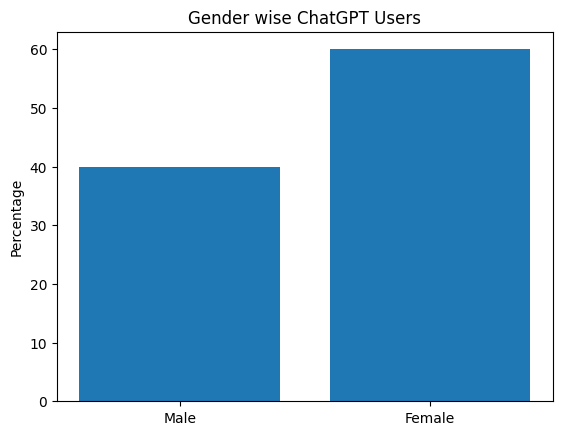

In [11]:
labels = ["Male", "Female"]
values = [40, 60]

plt.bar(labels, values)
plt.title("Gender wise ChatGPT Users")
plt.ylabel("Percentage")
plt.show()


# Search Engine usage

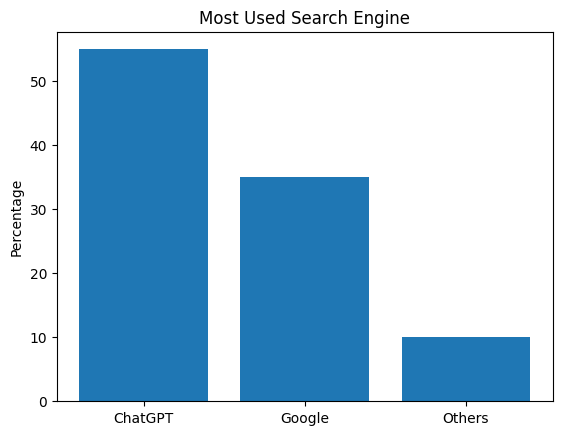

In [12]:
labels = ["ChatGPT", "Google", "Others"]
values = [55, 35, 10]

plt.bar(labels, values)
plt.title("Most Used Search Engine")
plt.ylabel("Percentage")
plt.show()


# Time spent on ChatGPT

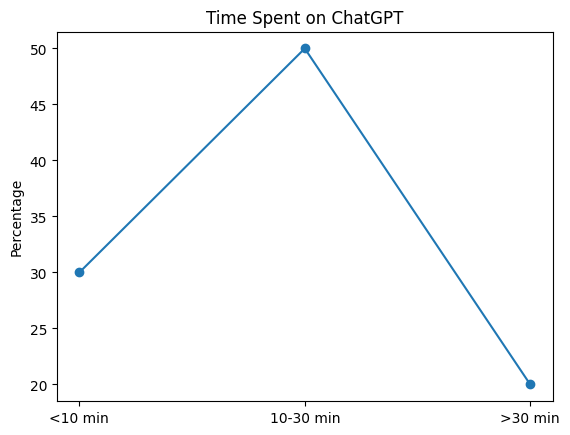

In [13]:
labels = ["<10 min", "10-30 min", ">30 min"]
values = [30, 50, 20]

plt.plot(labels, values, marker='o')
plt.title("Time Spent on ChatGPT")
plt.ylabel("Percentage")
plt.show()
